

# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we will analyze Movie data from TMDB. Movie analysis become more important over the last years, because if we can configure what characteristics that make a movie successful we can predict if a certain movie would succeed or not.[1]


In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Questions:
1- Which genres are most popular?

2- What kinds of properties are associated with movies that have high revenues?

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
df= pd.read_csv('tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


#### description of the dataset:
- budget: movie's budget in dollars
- genres: movie's type or genres
- homepage: a link of the movie's website
- id: movie's id number
- keywords: all keywords of a movie
- original_language: language of the movie
- original_title: title of the movie
- overview: a breif description of the movie
- popularity: number of how much the movie is popular
- production_companies: the name and id of the company that produced the movie
- release_date: the movie's date of release to the public
- revenue: revenue of the movie in dollars
- runtime: the time for the original version
- spoken_language: the language spoken in the movie
- status: status of the movie (if it is released or not)
- tagline: tagline with the title
- title: movie's title
- vote_count: number of people who voted for the movie
- vote_average: average of vote_count

In [4]:
df.shape

(4803, 20)

it seems from above that there is 4803 entries and 20 columns

In [5]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

as seen from the information above, there are some columns with null values which are:

homepage, id, overview, release_date, runtime, tagline

next, I will delete some columns that I am not propabaly going to use with the analysis. 

To do that I will use (drop) function.

In [7]:
df.drop(["homepage", "keywords", "original_title", "overview", "tagline", "id", "spoken_languages", "original_language"], axis=1, inplace=True)

now, let's see how the data look like

In [8]:
df.head()

,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Released,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,Released,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,Released,John Carter,6.1,2124



### Data Cleaning (fixing null values and incorrect date type):

First we will check to find if there are any null values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 12 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
status                  4803 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null int64
dtypes: float64(3), int64(3), object(6)
memory usage: 450.4+ KB


it seems from the information above that we have one null value in the release_date column and two null values in the runtime column

to fix this, I will fill the null values of "runtime" with the mean.

In [10]:
df.fillna(df.mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 12 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4803 non-null float64
status                  4803 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null int64
dtypes: float64(3), int64(3), object(6)
memory usage: 450.4+ KB


Regarding the missing value of releas_date I will just drop it, cause it will not affect my dataset and my analysis

In [11]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4802
Data columns (total 12 columns):
budget                  4802 non-null int64
genres                  4802 non-null object
popularity              4802 non-null float64
production_companies    4802 non-null object
production_countries    4802 non-null object
release_date            4802 non-null object
revenue                 4802 non-null int64
runtime                 4802 non-null float64
status                  4802 non-null object
title                   4802 non-null object
vote_average            4802 non-null float64
vote_count              4802 non-null int64
dtypes: float64(3), int64(3), object(6)
memory usage: 487.7+ KB


The next issue is the type of release_date it should be date time rather than a string. so to fix that, we will use (to_datetime) function.

In [12]:
df['release_date']= pd.to_datetime(df['release_date'])

In [13]:
df.head()

,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Released,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,Released,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,Released,John Carter,6.1,2124


Now, I will check if my change is done

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4802
Data columns (total 12 columns):
budget                  4802 non-null int64
genres                  4802 non-null object
popularity              4802 non-null float64
production_companies    4802 non-null object
production_countries    4802 non-null object
release_date            4802 non-null datetime64[ns]
revenue                 4802 non-null int64
runtime                 4802 non-null float64
status                  4802 non-null object
title                   4802 non-null object
vote_average            4802 non-null float64
vote_count              4802 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 487.7+ KB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Which genres are most popular ?)

To be able to deal with 'genres' data, I assumed that a movie would have one value that describe its genre instead of multiple values. This way I could investigate whether a certain type is popular in or not.

In [15]:
df['genres']= df['genres'].apply(lambda x: x.split('}')[0].split('"name":')[-1].replace('"',''))

In [16]:
df.head()

,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count
0,237000000,Action,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800
1,300000000,Adventure,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,Action,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Released,Spectre,6.3,4466
3,250000000,Action,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,Released,The Dark Knight Rises,7.6,9106
4,260000000,Action,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,Released,John Carter,6.1,2124


Let's first see what genre has more entries in the dataset

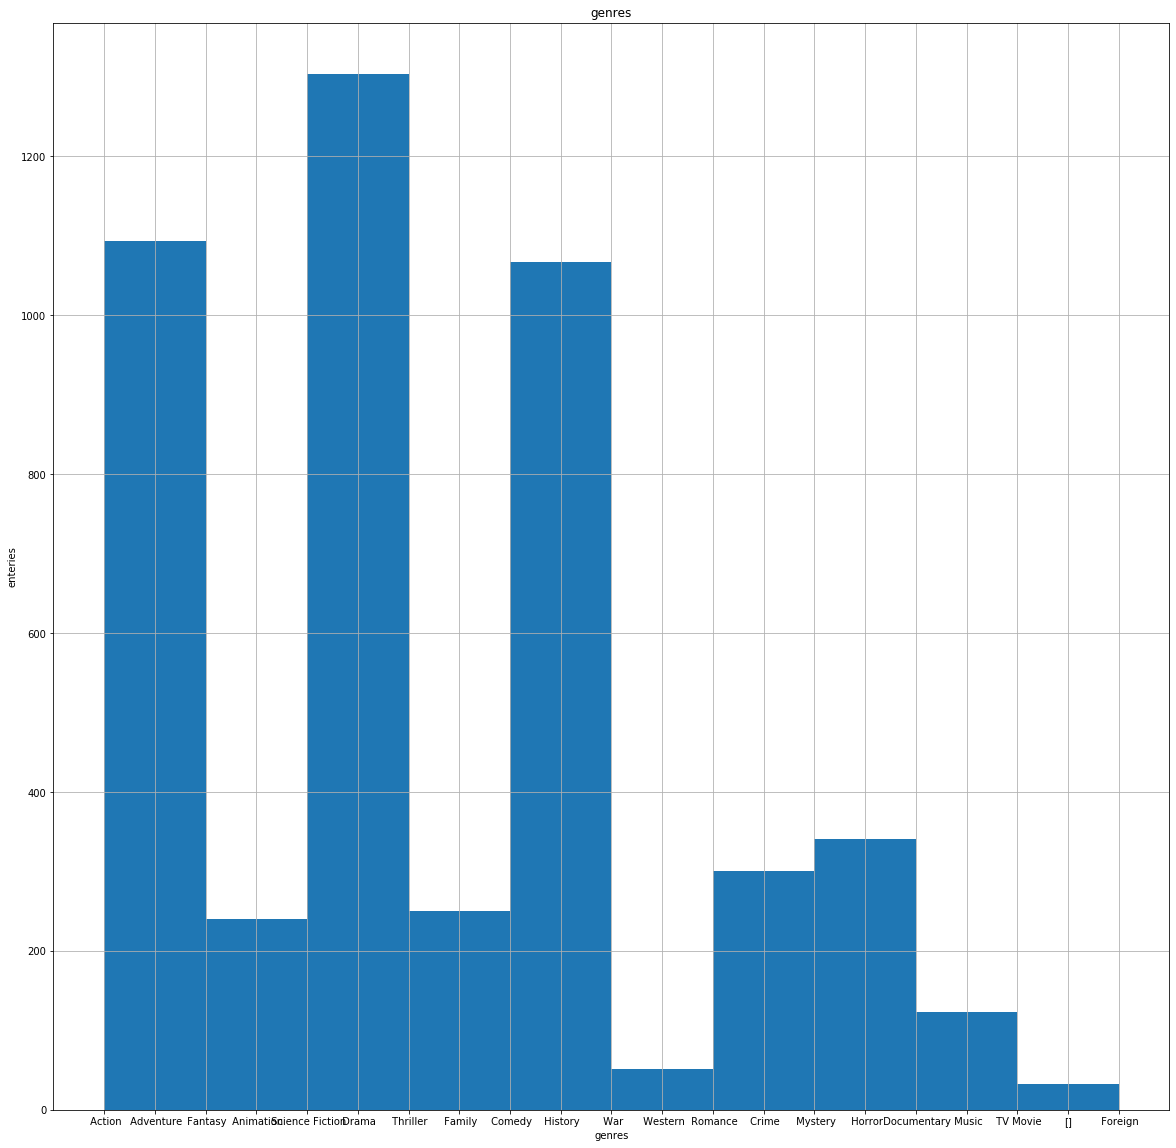

In [25]:
df['genres'].hist(figsize=(20,20))
plt.title('genres')
plt.xlabel('genres')
plt.ylabel('enteries');

>It seems that Fiction and Drama have the highest number of entries in the dataset

Great! now Let's investigate what kind of genres is more popular.

In [17]:
x= df.groupby('genres', as_index=False)['popularity'].mean()

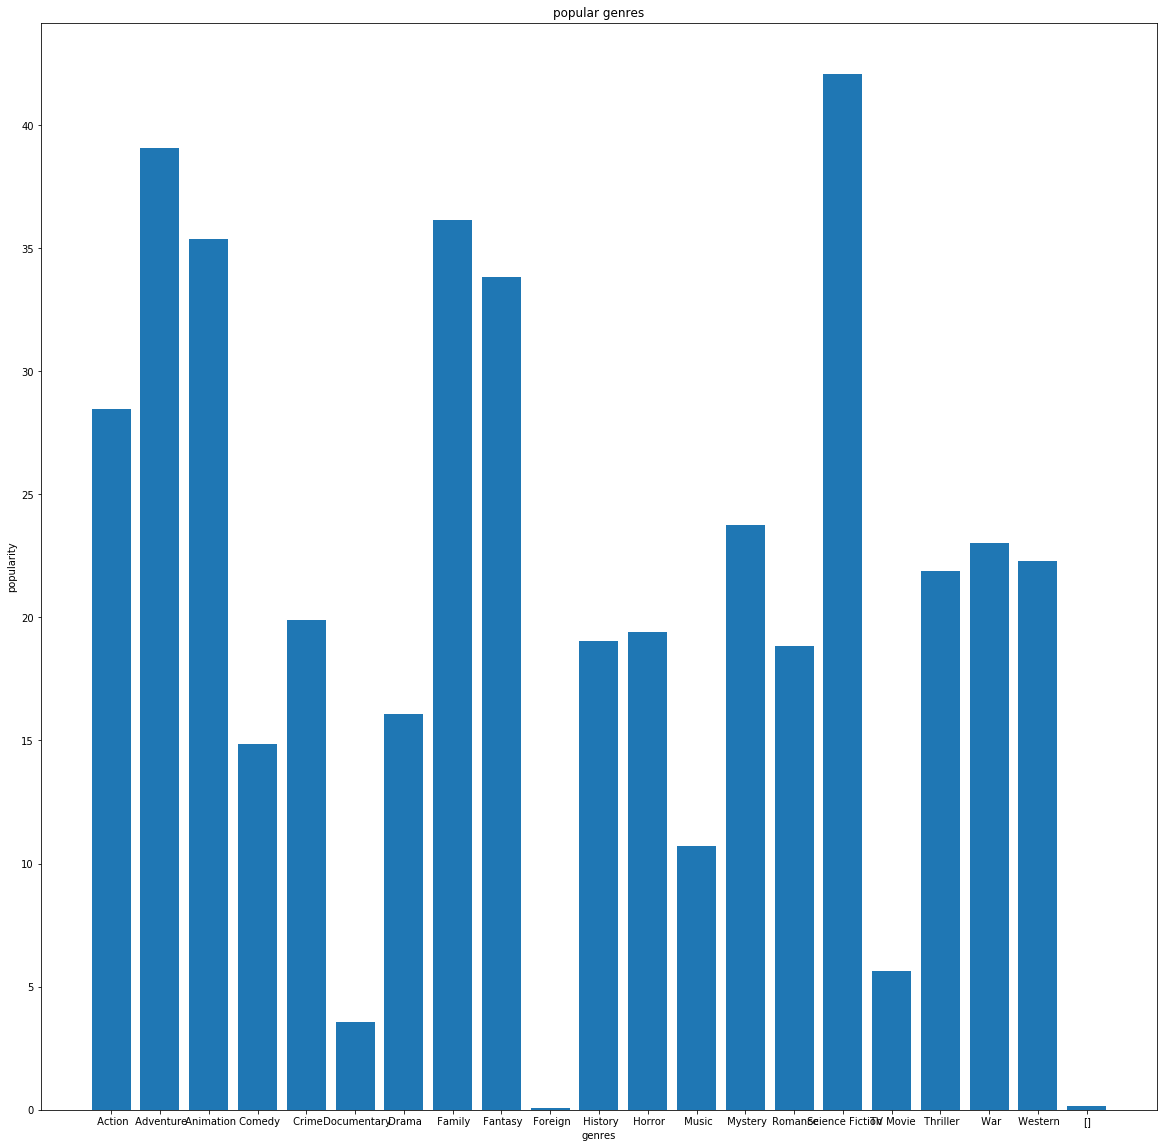

In [468]:
plt.rcParams['figure.figsize']=(20,20)
plt.bar(x['genres'], x['popularity'])
plt.title('popular genres')
plt.xlabel('genres')
plt.ylabel('popularity');

>It seems that the most popular genre is Science Fiction

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

Let's first see the ditribution of 'revenue'

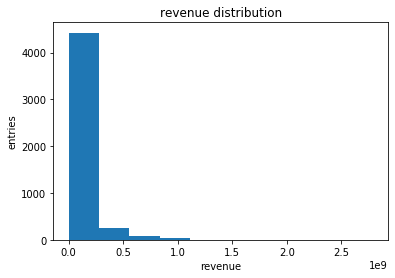

In [44]:
plt.hist(df.revenue)
plt.title('revenue distribution')
plt.xlabel('revenue')
plt.ylabel('entries');

Let's find out whether budget is associated to the revenue

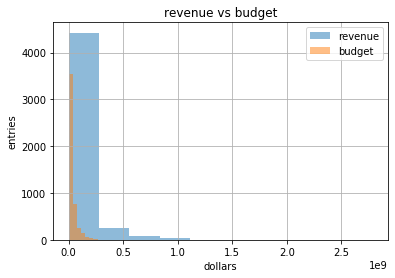

In [49]:
df.revenue.hist( alpha=0.5, label='revenue')
df.budget.hist( alpha=0.5, label='budget')
plt.title('revenue vs budget')
plt.xlabel('dollars')
plt.ylabel('entries')
plt.rcParams['figure.figsize']=(8,8)
plt.legend();

It seems there is no correlation between budget and revenue

Next, let's check whether the popularity is associated with revenue

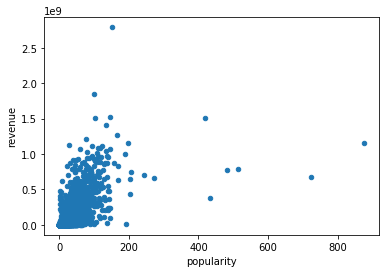

In [35]:
df.plot(x='popularity', y='revenue', kind='scatter');

It seems from above that the movie's revenue reaches its maximum value when the popularity was around 200. Overall when the movie is more popular it gains much revenues.

<a id='conclusions'></a>
## Conclusions


After doing this analysis, we come up with:

1- if we want to produce a movie that would be more popular hen aothers, it shpuld be of genre (Science Fiction or Drama)

2- the budget to make the movie is not that significant as much as other factors.


#### Limitations:
1- filling null values of the runtime with mean. This action may not be accurate for the analysis

2- In 'revenue' some values are zeros, this kind of value is not clear whether the movie had no revenue or it just a null value.

## References:
[1] https://www.kaggle.com/tmdb/tmdb-movie-metadata